# Piazza Data Collection & Analysis
Zehua Li
April 2017

This notebook looks at the timing distributions of the question and answer generation on piazza.

In [1]:
# python setup

% matplotlib inline

from piazza_api.rpc import PiazzaRPC
from datetime import datetime
import time

import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.stats as stats

## Piazza connection using API

In [2]:
#p = PiazzaRPC(classcode) # course
#p.user_login(username, password) # login

## Functions

In [3]:
def to_time(t): # convert to unix timestamp (in seconds)
    fmt = '%Y-%m-%dT%H:%M:%SZ'
    return time.mktime((datetime.strptime(t, fmt)).timetuple())

In [4]:
def to_hour(t): # convert to unix timestamp (in seconds)
    fmt = '%Y-%m-%dT%H:%M:%SZ'
    d = datetime.strptime(t, fmt)
    h = d.hour*3600. + d.minute*60. + d.second
    return h

In [5]:
def diff_time(t1, t2):# subtract
    return int(abs(t1-t2))

In [6]:
def get_timing(cid,tag = None):
    try:
        if (p.content_get(cid)["type"] != "question"):
            return None # if not a question, ignore
        if (tag is not None):
            if(tag not in p.content_get(cid)["tags"]):
                return None # if does not meet the requested tag, ignore
        c_time = to_time(p.content_get(cid)['created']) # time thread is created
        s_time = -1 # time thread is resolved by student, -1 if never
        i_time = -1 # time thread is resolved by instructor, -1 if never
        for x in p.content_get(cid)["children"]:
            if (x["type"]=="s_answer"):
                s_time = to_time(x['created'])
            if (x["type"]=="i_answer"):
                i_time = to_time(x['created'])
        return [c_time,s_time,i_time]
    except:
        pass # if post does not exist, ignore

In [7]:
def get_daily_timing(cid,tag = None):
    try:
        if (p.content_get(cid)["type"] != "question"):
            return None # if not a question, ignore
        if (tag is not None):
            if(tag not in p.content_get(cid)["tags"]):
                return None # if does not meet the requested tag, ignore
        c_time = to_hour(p.content_get(cid)['created']) # time thread is created
        return [c_time]
    except:
        pass # if post does not exist, ignore

In [8]:
def get_latency(cid,tag = None):
    try:
        if (p.content_get(cid)["type"] != "question"):
            return None # if not a question, ignore
        if (tag is not None):
            if(tag not in p.content_get(cid)["tags"]):
                return None # if does not meet the requested tag, ignore
        c_time = to_time(p.content_get(cid)['created']) # time thread is created
        s_time = -1 # time thread is resolved by student, -1 if never
        i_time = -1 # time thread is resolved by instructor, -1 if never
        for x in p.content_get(cid)["children"]:
            if (x["type"]=="s_answer"):
                s_time = diff_time(to_time(x['created']),c_time)
            if (x["type"]=="i_answer"):
                i_time = diff_time(to_time(x['created']),c_time)
        return [c_time,s_time,i_time]
    except:
        pass # if post does not exist, ignore

## New Posts

In [ ]:
[idx_start,idx_end,tag] = [2468,3084,'chatroom']

t_c_arr = []
t_last = 0

start_time = time.time()

for i in range(idx_start,idx_end):
    t_cur = get_timing(i,tag)
    if (t_cur != None):
        if (t_last == 0):
            t_last = t_cur[0]
        t_c_arr.append(t_cur[0]-t_last)
        t_last = t_cur[0]

print("--- %s seconds ---\n" % (time.time() - start_time))

In [ ]:
t_c_arr

TypeError: len() of unsized object

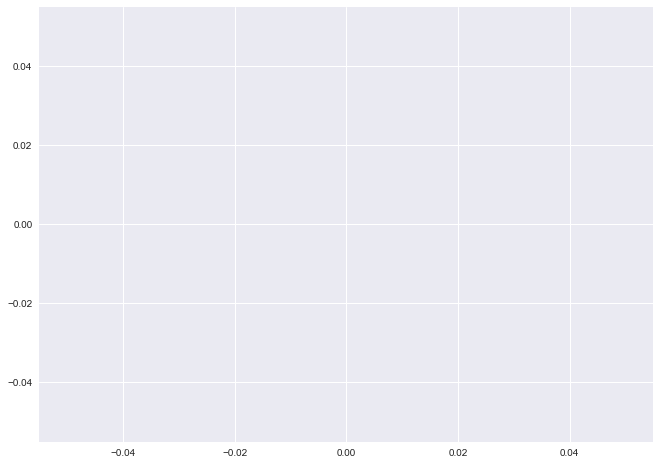

In [17]:
fig, ax = plt.subplots(figsize=(11,8))
sns.distplot(t_c_arr, kde=False, rug=True, ax=ax, fit=stats.expon, label = "new post")
ax.set_xlabel('Time (seconds)', fontsize=14)
ax.set_ylabel('Number of post', fontsize=14)
ax.set_title('Kernel density estimation', fontsize=14)
plt.legend();

## Instructor Answers

In [ ]:
[idx_start,idx_end,tag] = [1,200,'hw1']

t_i_arr = []

start_time = time.time()

for i in range(idx_start,idx_end):
    t_cur = get_latency(i,tag)
    if (t_cur != None):
        if (t_cur[2] != -1):
            t_i_arr.append(t_cur[2])

print("--- %s seconds ---\n" % (time.time() - start_time))

## Daily distribution (post)

In [ ]:
[idx_start,idx_end] = [1,400]

t_h_arr = []
t_last = 0

start_time = time.time()

for i in range(idx_start,idx_end):
    t_cur = get_daily_timing(i)
    if (t_cur != None):
        t_h_arr.append(t_cur[0])

print("--- %s seconds ---\n" % (time.time() - start_time))